# Regresión Lineal

#### Consideremos un caso de uso en el que hemos recopilado las calificaciones promedio de los estudiantes en pruebas y sus respectivas horas promedio de estudio para la prueba para un grupo de estudiantes con un coeficiente intelectual similar.

### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
from sklearn.linear_model import LinearRegression

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

#### Graficar las calificaciones obtenidas vs las horas estudiadas

In [2]:
# Load data
df = pd.read_csv('../../datasets/grades/grades_regression.csv')
print(df)


   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


Scatter plot de las variables

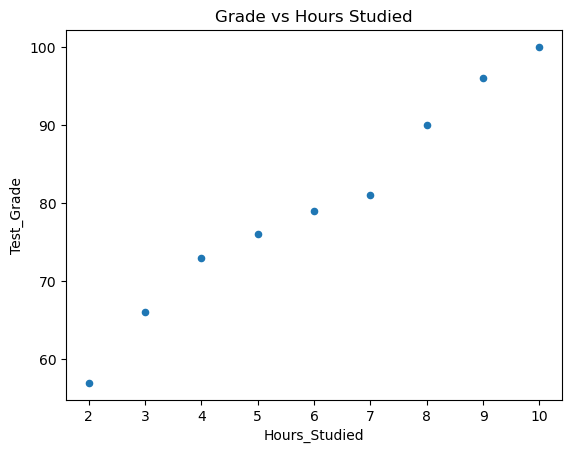

In [3]:
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

Matriz de correlación de las variables

In [4]:
print("Matriz de correlación")
print(df.corr())

Matriz de correlación
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


Visualizar distribución de los datos

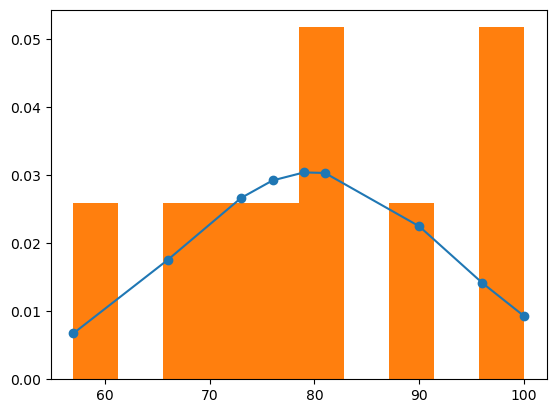

In [5]:
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))
plt.plot(df.Test_Grade,fit,'-o')
plt.hist(df.Test_Grade, density=True)
plt.show()

#### Crear el modelo de regresión

Preparar los datos

In [6]:
x= df.loc[:,"Hours_Studied":"Hours_Studied"].values # variable independiente
y= df.Test_Grade.values                             # variable dependiente

In [7]:
x

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(x, y)

LinearRegression()

Visualización de parámetros estimados

In [9]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


Predicción de nuevos datos

In [10]:
predicted_grades = model.predict(x)

Predicción manual usando los parámetros estimados

In [11]:
intercept = model.intercept_
coefficient = model.coef_
print("Manual prediction :", intercept + coefficient * 6)

Manual prediction : [79.77777778]


Predicción usando el método del modelo

In [12]:
print("Using predict function: ", model.predict([[6]]))

Using predict function:  [79.77777778]


Visualización de la función estimada

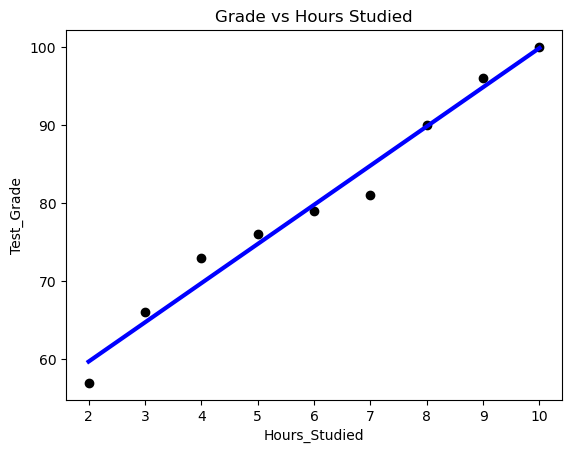

In [13]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

#### Verificar el rendimiento del modelo ajustado a través de R-cuadrado

Agregar el valor predicho al dataframe

In [14]:
df['Test_Grade_Pred'] = model.predict(x)

Calcular el valor de R-cuadrado de manera manual

In [15]:
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

In [16]:
print("Suma de SSR:", df['SSR'].sum())
print("Suma de SST:", df['SST'].sum())

Suma de SSR: 1510.0166666666673
Suma de SST: 1547.5555555555557


In [17]:
print(df)

   Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111


In [18]:
print("Cálculo manual del valor R-cuadrado: ", df['SSR'].sum() / df['SST'].sum())

Cálculo manual del valor R-cuadrado:  0.9757431074095351


Cálculo del valor R-cuadrado usando las funciones predefinidas

In [19]:
# Using built-in function
print("R-cuadrado: ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))


R-cuadrado:  0.9757431074095347
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


# Outliers

Introduzcamos un valor atípico; por ejemplo, un estudiante ha estudiado 5 horas y obtuvo una puntuación de 100. Supongamos que este estudiante tiene un coeficiente intelectual más alto que los demás del grupo. Observe la disminución del valor de R-cuadrado. Por lo tanto, es importante aplicar lógica de negocios para evitar la inclusión de valores atípicos en el conjunto de datos de entrenamiento con el fin de generalizar el modelo y aumentar la precisión.

In [20]:
# Cargar los datos
df = pd.read_csv('../../datasets/grades/grades_regression.csv')

# Añadir un nuevo registro con valor atípico
df.loc[9] = np.array([5, 100])

In [21]:
# Separar datos
x= df.Hours_Studied.values[:, np.newaxis] # variable independiente
y= df.Test_Grade.values                   # variable dependiente

In [22]:
# Crear el modelo
lr = LinearRegression()
# Entrenar el modelo
lr.fit(x, y)

LinearRegression()

In [23]:
# Visualizar valores estimados
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Intercept:  54.4022988505747
Coefficient:  [4.64367816]


In [24]:
# Predicción manual
intercept = model.intercept_
coefficient = model.coef_
print("Predicción manual :", intercept + coefficient * 6)

Predicción manual : [79.77777778]


In [25]:
# Predicción usando la el método predict
print("Predicción: ", lr.predict([[6]]))

Predicción:  [82.26436782]


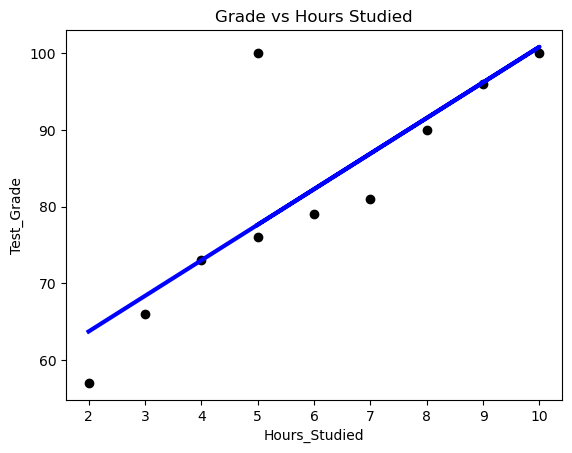

In [26]:
# Grafica de la función estimada
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

In [27]:
# Agregar el valor predicho al dataframe
df['Test_Grade_Pred'] = lr.predict(x)

In [28]:
# Cálculo de métricas con funciones predefinidas
print("R Cuadrado : ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

R Cuadrado :  0.6855461390206965
Mean Absolute Error:  4.480459770114941
Root Mean Squared Error:  7.761235830020588
